# Overview to Plan Evaluation plotting
This notebook will cover how to use the `PlotFactory` object to generate plots to aid in our  plan evaluation process. The overarching goal here is to take a handful of proposed district plans and contextualize them against either a county-aware ReCom ensemble or a "citizen ensemble" of dozens-to-hundreds of publicly submitted plans. A necessary prerequisite to making these plots is having `jsonl` files that contain the scores of the proposed, citizen, and ReCom ensembles. Usually these will be in the `PlanAnalysis` DropBox folder, but you can store the files locally and point the `PlotFactory` to them if needed.

In [45]:
from plotting_class import PlotFactory

For these examples, we will generate plots to analyze Michigan's Congressional district plans, since we have four proposed plans and a hefty citizen ensemble, plus a 100K-step ReCom ensemble to draw from.

In [46]:
state = "Michigan"
plan_type = "congress"

Depending on the state and plan type, loading in the `PlotFactory` object can take up to a minute or so, since it needs to unzip and load all of the `jsonl` objects.

In [47]:
%%time
factory = PlotFactory(state, plan_type)

CPU times: user 13.1 s, sys: 1.2 s, total: 14.3 s
Wall time: 14.4 s


Before we plot, we can take a look at what metrics are supported. For each metric in `ensemble_metrics`, we can look up the `name` that will be placed on the plots, and the `type` of metric it is, which can either be plan wide, election level, or district level.

In [48]:
factory.ensemble_metrics

{'TOTPOP': {'name': 'TOTPOP', 'type': 'district_level'},
 'WHITE': {'name': 'WPOP', 'type': 'district_level'},
 'BLACK': {'name': 'BPOP', 'type': 'district_level'},
 'AMIN': {'name': 'AMINPOP', 'type': 'district_level'},
 'ASIAN': {'name': 'ASIANPOP', 'type': 'district_level'},
 'NHPI': {'name': 'NHPIPOP', 'type': 'district_level'},
 'OTHER': {'name': 'OTHERPOP', 'type': 'district_level'},
 '2MORE': {'name': '2MOREPOP', 'type': 'district_level'},
 'HISP': {'name': 'HPOP', 'type': 'district_level'},
 'VAP': {'name': 'VAP', 'type': 'district_level'},
 'WVAP': {'name': 'WVAP', 'type': 'district_level'},
 'BVAP': {'name': 'BVAP', 'type': 'district_level'},
 'AMINVAP': {'name': 'AMINVAP', 'type': 'district_level'},
 'ASIANVAP': {'name': 'ASIANVAP', 'type': 'district_level'},
 'NHPIVAP': {'name': 'NHPIVAP', 'type': 'district_level'},
 'OTHERVAP': {'name': 'OTHERVAP', 'type': 'district_level'},
 '2MOREVAP': {'name': '2MOREVAP', 'type': 'district_level'},
 'HVAP': {'name': 'HVAP', 'type': 'dis

We can also check to see how many plans are in our ReCom ensemble, citizen ensemble, and proposed plan list:

In [49]:
len(factory.ensemble_plans)

100000

In [50]:
len(factory.citizen_plans)

110

In [51]:
len(factory.proposed_plans)

4

# Plotting
## Histogram plots
There are two types of metrics that can be represented as histograms: plan-wide scores (like county splits, or swing districts), or election level scores like Democratic seats, when we want to see one election only.
### Plan-wide scores

By default, the plot will only show the scores of the ReCom ensemble.

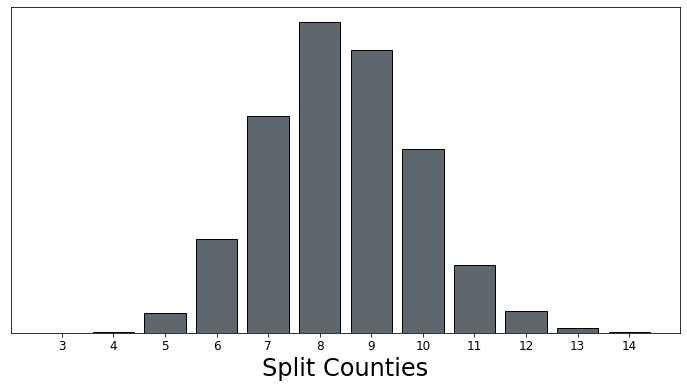

In [52]:
factory.plot("num_split_counties")

If we want to look at the citizen ensemble as well, we can do so by specifying so in the `kinds` argument:

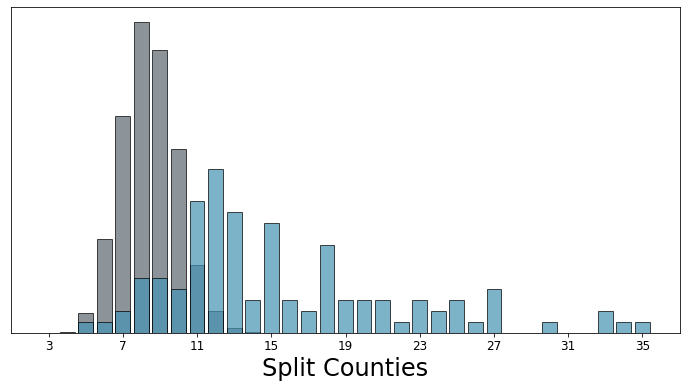

In [54]:
factory.plot("num_split_counties", kinds=["ensemble", "citizen"])

...and we can fold in the proposed plans as well. This is a good time to note that sometimes the proposed plans will have the same value — here, Birch, Juniper, and Maple all have 13 split counties. To distinguish them, the `PlotFactory` will randomly jitter them horizontally, making sure to keep them all within the correct bin. Sometimes that jittering will be too slight to distinguish the plans — if so, simply try rerunning the function until you get a jittering that looks appropriate.

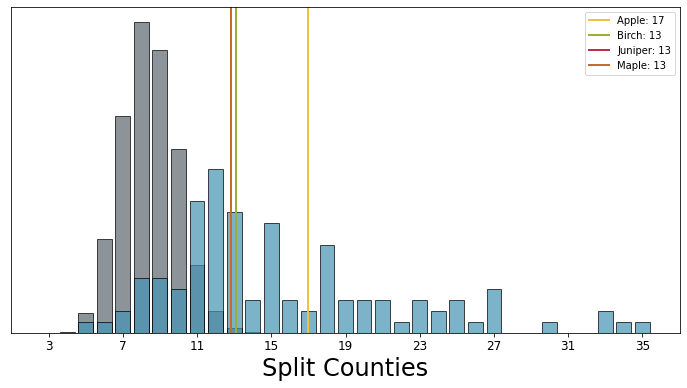

In [57]:
# try rerunning this until you can distinguish Birch, Juniper, and Maple
factory.plot("num_split_counties", kinds=["ensemble", "citizen", "proposed"])

### Election-level scores on one election
Here's an example of an election-level score — Democratic seats — plotted on only one election. To do so, we need to specify some election.

In [58]:
factory.election_names

['PRES16', 'GOV18', 'SEN18', 'SOS18', 'AG18']

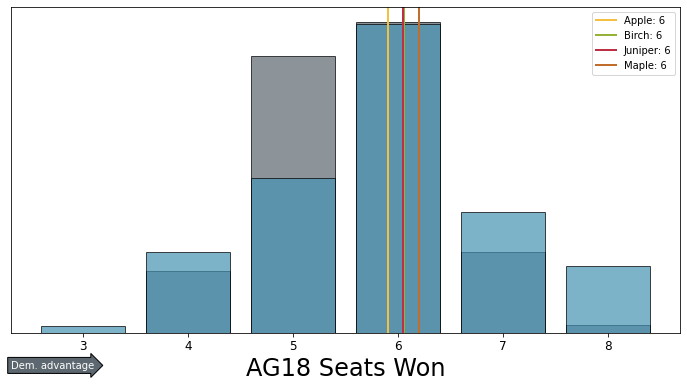

In [67]:
factory.plot("seats", election="AG18", kinds=["ensemble", "citizen", "proposed"])

Note that you don't always need to plot the ReCom and citizen ensembles together — below, we make one plot comparing the mean-median scores of the proposed plans to the citizen ensemble, and one comparing to the ReCom ensemble. Note that the domains of the two plans are different!

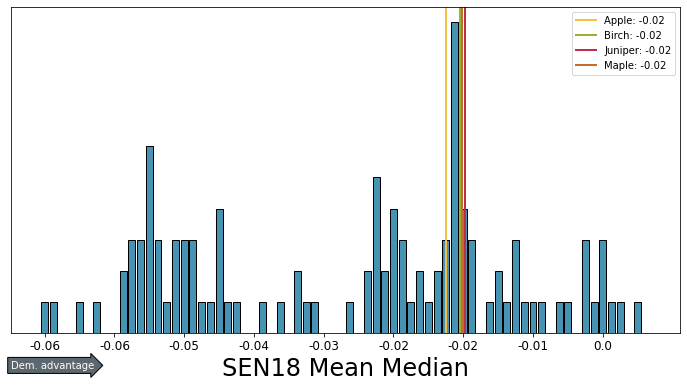

In [60]:
factory.plot("mean_median", election="SEN18", kinds=["citizen", "proposed"])

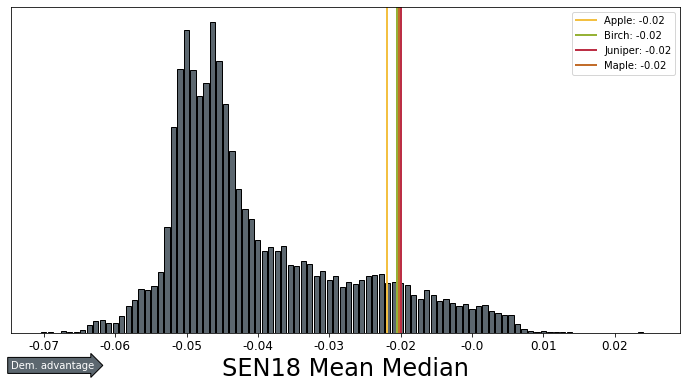

In [61]:
factory.plot("mean_median", election="SEN18", kinds=["ensemble", "proposed"])

## Violin Plots
Both election-level and district-level metrics can be visualized as violin plots. Here, we can't overlay the ReCom and citizen ensembles — you have to either choose to make violin plots of one or the other, and optionally overlay the proposed plans.
### Election-level scores
Below, we show the partisan bias scores of our ReCom ensemble over every election in the dataset, with the four proposed plans' partisan bias scores marked as colored dots, horizontally jittered. As before, you might have to re-jitter the plot to see every dot. For the ReCom ensembles, the violins end at the 1st and 99th percentile of the data seen for each election.

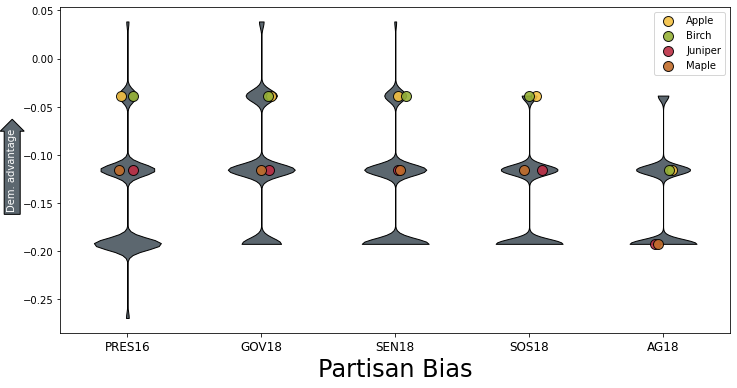

In [62]:
factory.plot("partisan_bias", kinds=["ensemble", "proposed"])

Let's plot the seats violin plot of our citizen ensemble, with proposed plans overlaid. For citizen ensembles, the violins extend to cover the whole dataset, since we want to see the full extent of what the public submitted. The `seats` violin plot also contains a light blue marker at the proportional seats outcome for each election, along with a line marking the 50\% point. Note here that even though `seats` is a discrete metric, the violin plots "smooth out" the distribution, which can be confusing — it's important to note that in, say, `PRES16`, the citizen ensemble found plans with either 3, 4, 5, 6, 7, 8 or 9 Democratic-majority seats, and the proposed plans either had 5 or 6 seats.

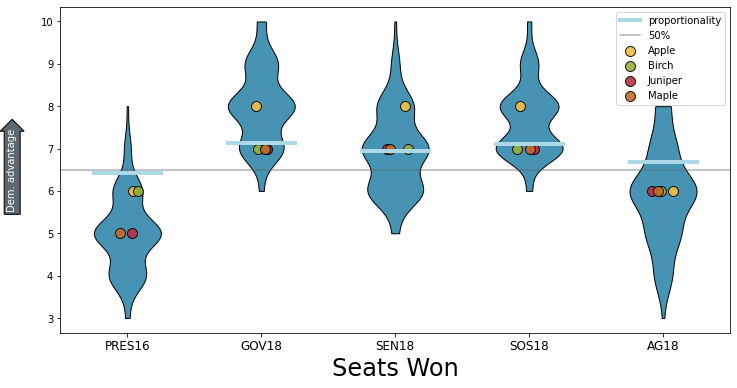

In [64]:
factory.plot("seats", kinds=["citizen", "proposed"])

(we can zoom in to `PRES16` alone to see the distribution as a histogram)

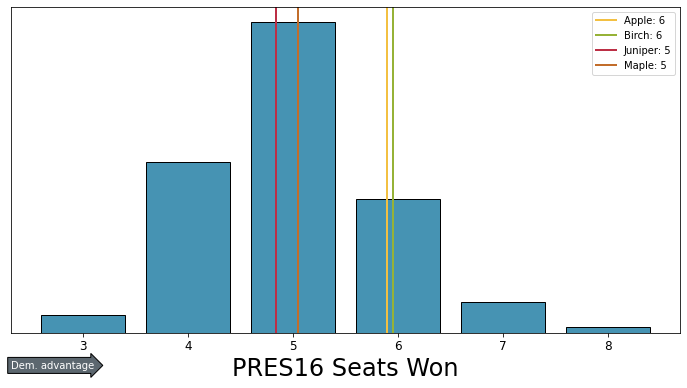

In [65]:
factory.plot("seats", election="PRES16", kinds=["citizen", "proposed"])

Here's another example of a violin plot, this one comparing efficiency gap scores.

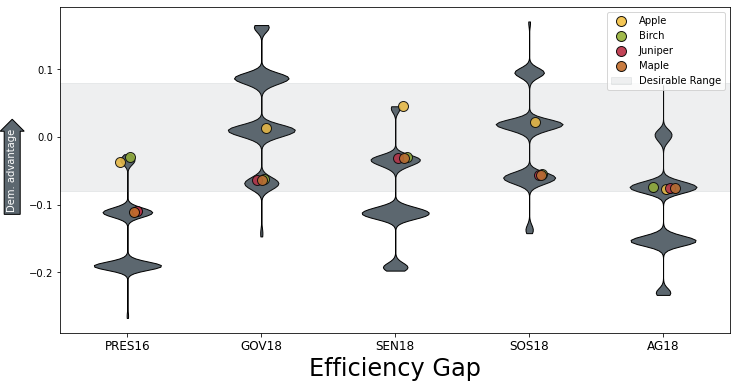

In [70]:
factory.plot("efficiency_gap", kinds=["ensemble", "proposed"])

Note that if you do try to plot both the ReCom ensemble and the citizen ensemble in the same violin plot, the only the first kind of plan will be chosen (below we choose to omit the proposed plans, just for variety's sake).

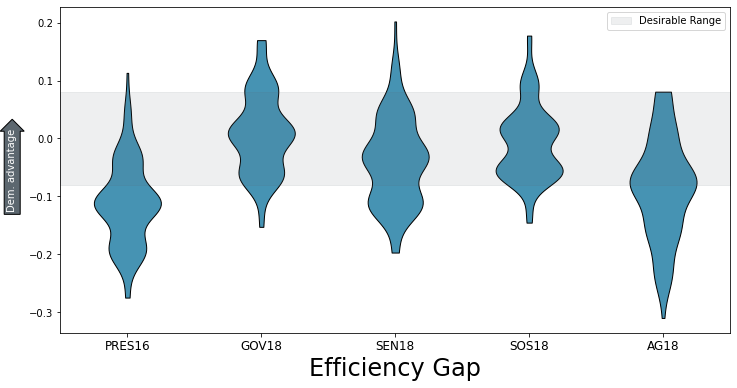

In [71]:
factory.plot("efficiency_gap", kinds=["citizen", "ensemble"])

## Boxplots
We can visualize demographic scores using boxplots, where we fix a demographic group and sort the districts in each plan by demographic share. We can then see, for example, how much variation in the district with the highest Black Voting Age Population (BVAP) among all our districts.

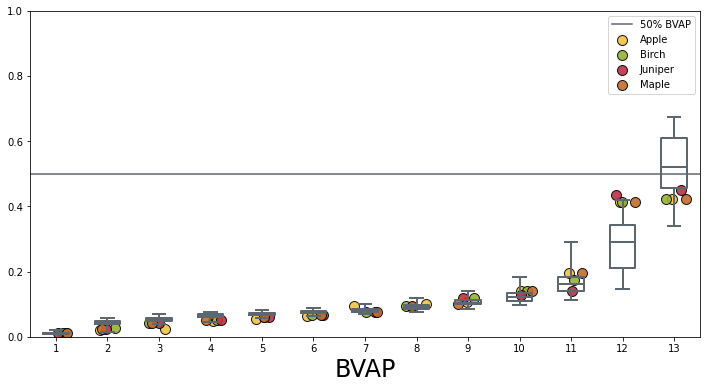

In [73]:
factory.plot("BVAP", boxplot=True, kinds=["ensemble", "proposed"])

If we are looking at a demographic group that will never reach higher than 40\% of a district, the y-axis will scale appropriately:

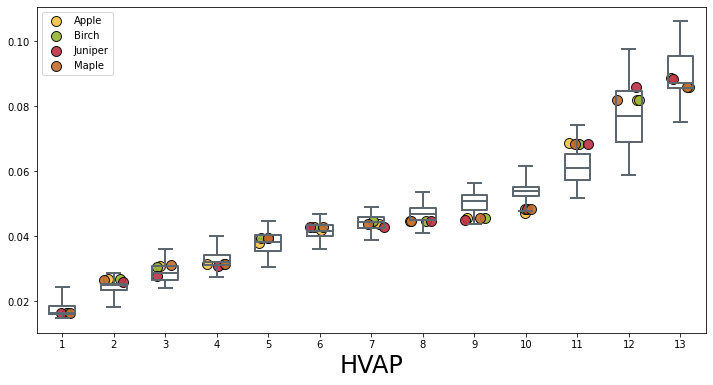

In [74]:
factory.plot("HVAP", boxplot=True, kinds=["ensemble", "proposed"])

We can also set `boxplot` to `False` and see the same plot with violin plots, if we prefer.

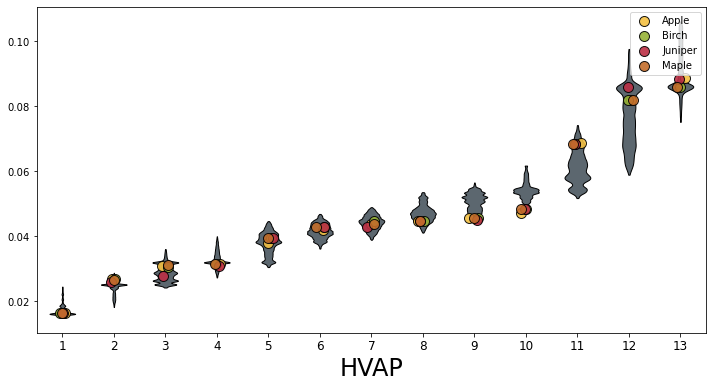

In [75]:
factory.plot("HVAP", boxplot=False, kinds=["ensemble", "proposed"])

## Miscellaneous
### Saving
When calling our `.plot()` function, we can pass `save=True` to save the plot. By default, the plot will be saved to the `{state}/plots/` folder in the `plan-evaluation-reporting` GitHub repo, but you can specify a different output folder when calling the `PlotFactory(output_dir={my_output_folder})` function
### Unresolved errors
* Demographic plots (both boxplots and violins) will fail if you don't include `"proposed"` in the `kinds` list when calling the function
* The `num_party_wins_by_district` metric is not yet supported